In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from finta import TA
import mplfinance as mpf
from pandas_datareader import data as web
import yfinance as yf
from datetime import datetime

%matplotlib notebook

In [2]:
def get_stock_data(symbol):
    end_date = datetime.now()
    start_date = datetime(2000, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)

    return df

In [3]:
def add_stock_data(symbol, data_set):
    end_date = datetime.now()
    start_date = datetime(2003, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)
    hist_close = df[["Close"]]
    hist_close.rename(columns={"Close": symbol+"_close"}, inplace = True)
    #hist_close.index.names = ['date']
    dataset = pd.merge(data_set, hist_close, on=["Date"])
    return dataset

In [4]:
SYMBOL = "AAPL"

<IPython.core.display.Javascript object>


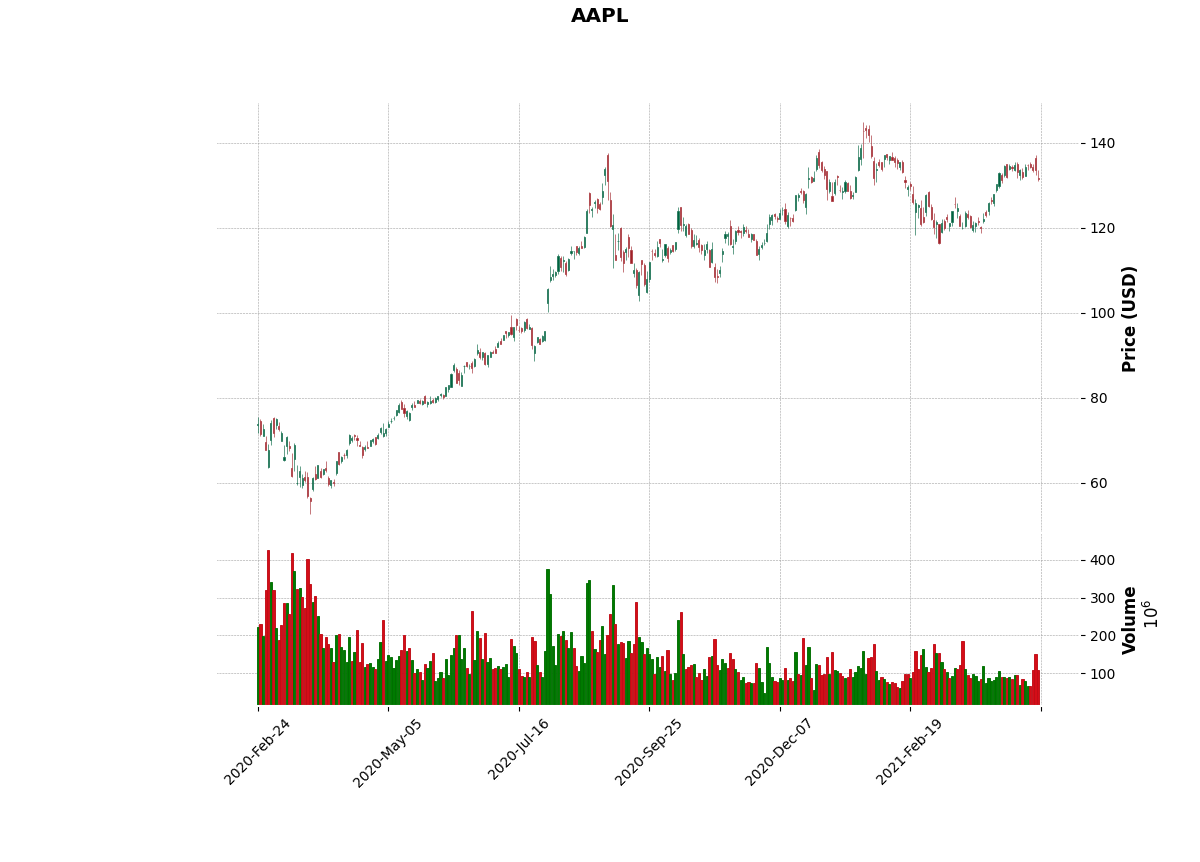

In [5]:

df = get_stock_data(SYMBOL)
mpf.plot(df.tail(300), type='candle', style='charles',
        title=SYMBOL,
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        )

In [6]:
df.dtypes
#df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

<IPython.core.display.Javascript object>


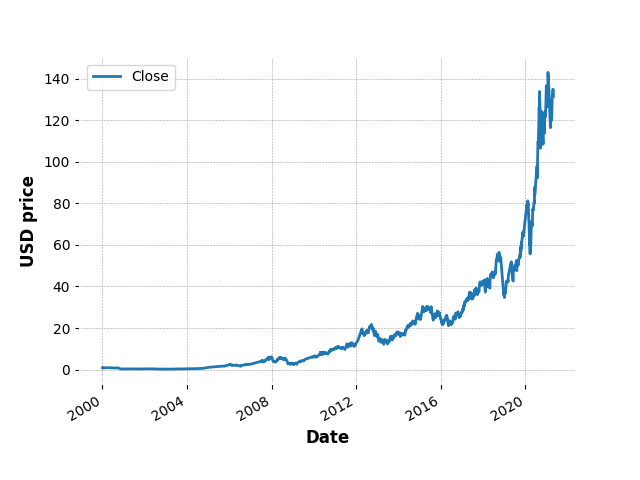

Text(0.5, 0, 'Date')

In [7]:
ax = df.plot(y='Close')

ax.set_ylabel("USD price")
ax.set_xlabel("Date")

In [8]:
import math
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['Close']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['21sd'] =  dataset['Close'].rolling(window=21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['21sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['21sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    dataset['log-momentum'] = np.log(dataset['momentum'])
    
    return dataset

In [9]:
dataset_TI_df = get_technical_indicators(df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


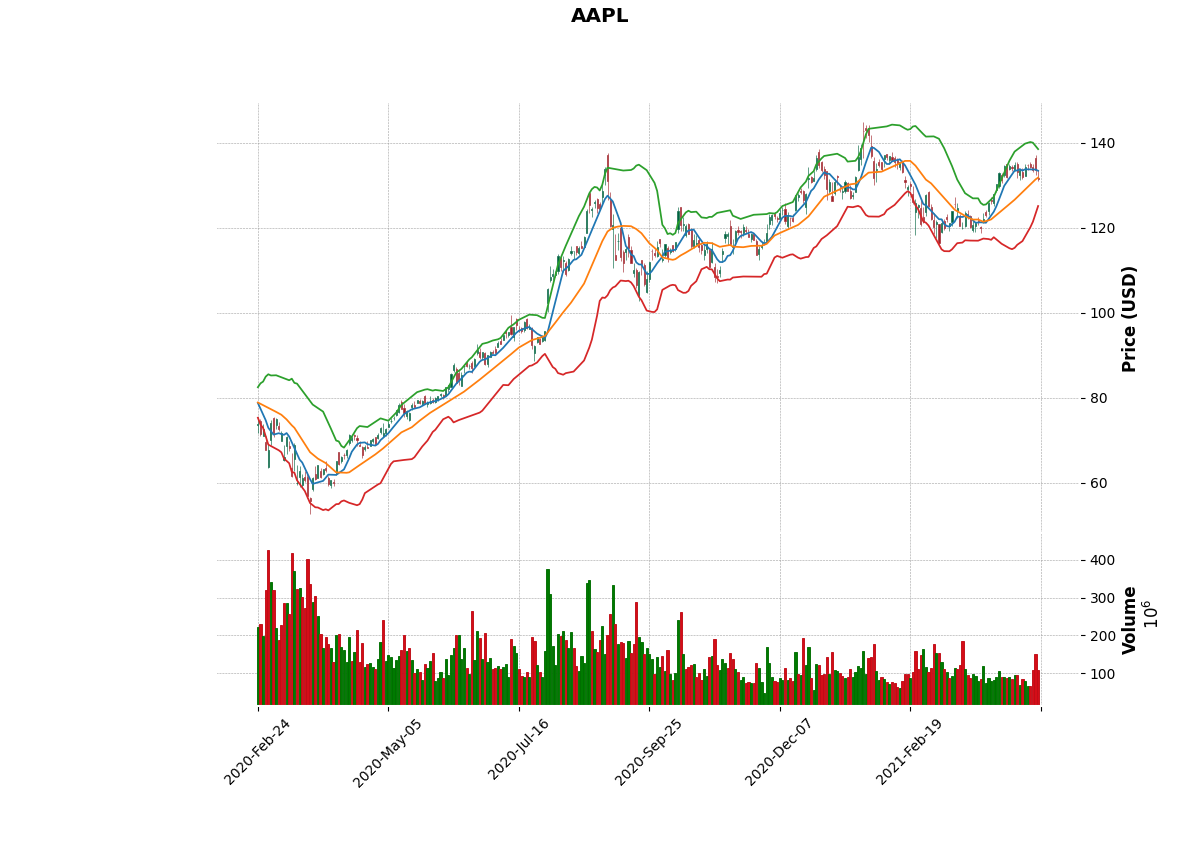

In [10]:
import mplfinance as mpf

bands_plot = pd.concat([dataset_TI_df['ma7'].tail(300), dataset_TI_df['ma21'].tail(300), 
                        dataset_TI_df['upper_band'].tail(300), dataset_TI_df['lower_band'].tail(300)], axis=1)

apd = mpf.make_addplot(bands_plot)

mpf.plot(dataset_TI_df.tail(300), type='candle', style='charles',
        title=SYMBOL,
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

In [11]:
import matplotlib.pyplot as plt

def plot_technical_indicators(dataset, last_days):
  
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    print(xmacd_)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for ' + SYMBOL+' - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.plot(dataset['log-momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


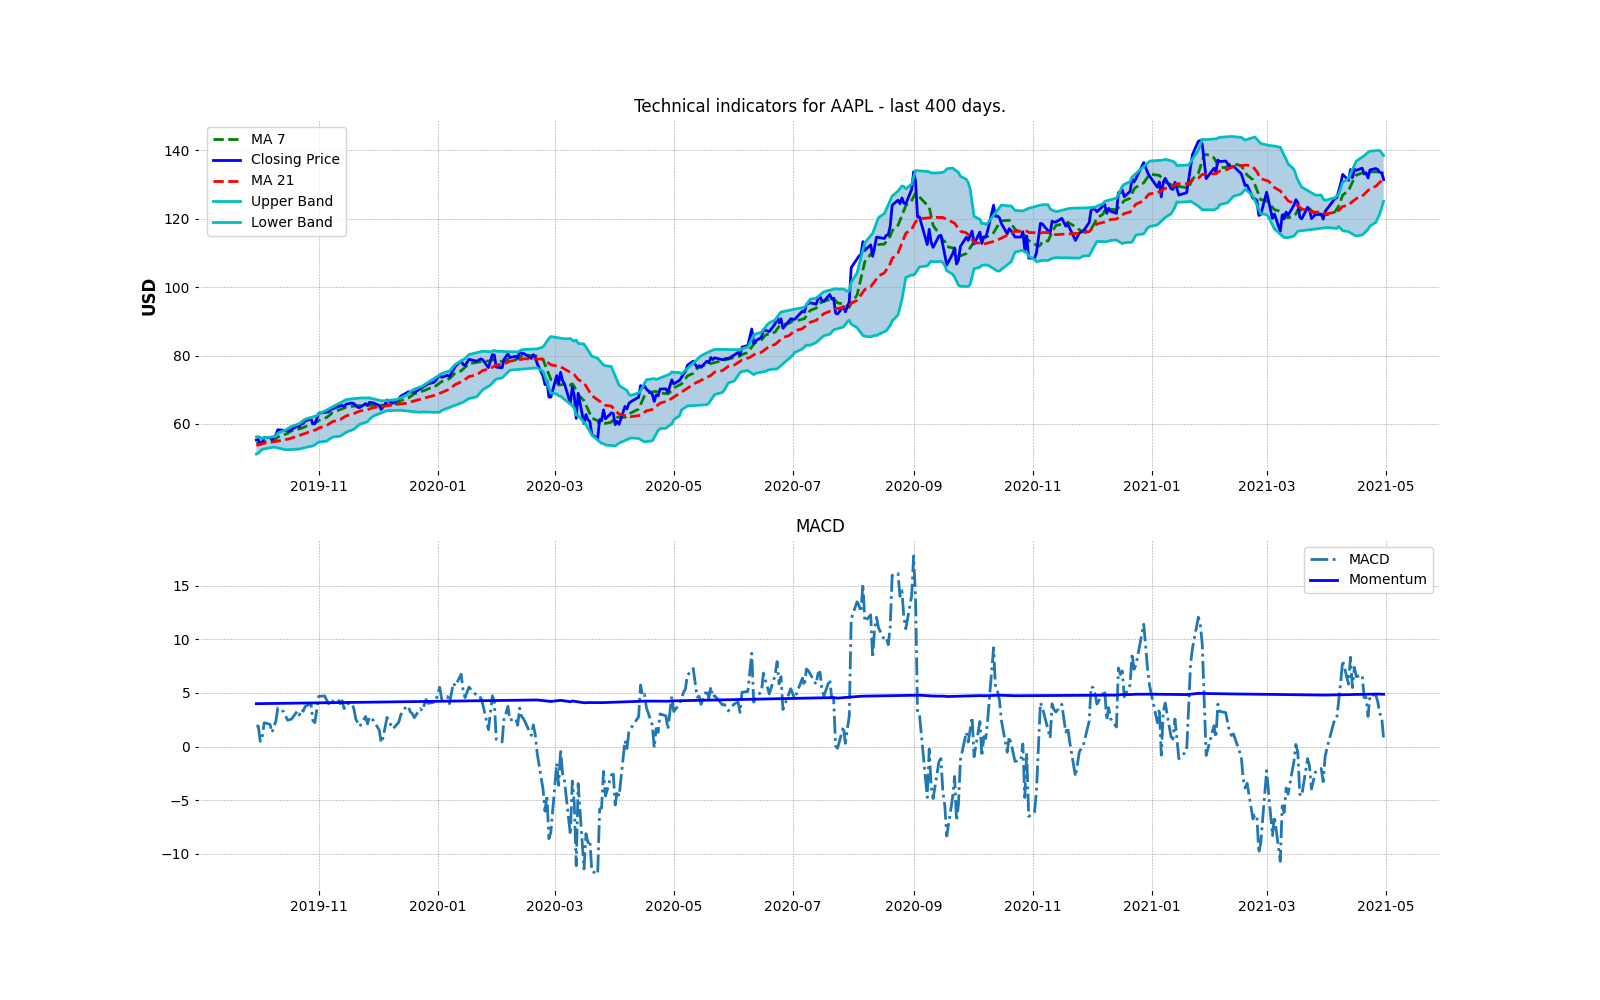

0


In [12]:
plot_technical_indicators(dataset_TI_df, 400)

In [13]:
df.dropna(axis=0, how='any')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma7,ma21,26ema,12ema,MACD,21sd,upper_band,lower_band,ema,momentum,log-momentum
Date,,,,,,,,,,,,,,,,,,
2000-03-01,0.911834,1.015658,0.911353,1.002200,1077003200,0.0,0.0,0.894135,0.865420,0.867638,0.890818,0.134562,0.050964,0.967348,0.763493,0.960451,0.002200,-6.119511
2000-03-21,0.942597,1.051709,0.935387,1.037770,524328000,0.0,0.0,0.940811,0.929739,0.922335,0.947774,0.115435,0.048375,1.026489,0.832988,1.007415,0.037770,-3.276242
2000-03-22,1.021187,1.110352,1.011814,1.108909,567996800,0.0,0.0,0.965944,0.940863,0.936344,0.972566,0.172565,0.060557,1.061977,0.819749,1.075078,0.108909,-2.217241
2000-03-23,1.092086,1.156496,1.076704,1.086799,562564800,0.0,0.0,0.995677,0.950042,0.947629,0.990142,0.139170,0.067335,1.084711,0.815372,1.082892,0.086799,-2.444164
2000-03-24,1.095450,1.106987,1.042096,1.066610,446913600,0.0,0.0,1.020328,0.958642,0.956545,1.001907,0.110065,0.070219,1.099079,0.818205,1.072037,0.066610,-2.708899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,134.830002,135.059998,133.559998,134.720001,66905100,0.0,0.0,133.798573,129.514763,129.906590,132.486304,4.813411,5.275836,140.066435,118.963090,134.381224,133.720001,4.895748
2021-04-27,135.009995,135.410004,134.110001,134.389999,66015800,0.0,0.0,133.831430,130.142382,130.238695,132.779180,4.151305,5.016053,140.174487,120.110276,134.387074,133.389999,4.893277
2021-04-28,134.309998,135.020004,133.080002,133.580002,107760100,0.0,0.0,133.651430,130.722858,130.486199,132.902384,3.093803,4.644097,140.011052,121.434664,133.849026,132.580002,4.887186


In [14]:
#add vix data
#df_vix = pd.read_csv("./data/vix-daily.csv", header=0, index_col="Date", parse_dates=True)
#df_vix.index.names = ['date']
#dataset_TI_df = pd.merge(dataset_TI_df, df_vix, on=["date"])
dataset_TI_df = add_stock_data("^VIX", dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
#add similar company data
#df_AAPL = pd.read_csv("./data/AAPL_daily.csv", header=0, index_col="date", parse_dates=True)
#df_AAPL_close = df_AAPL[['4. close']]
#df_AAPL_close.rename(columns={"4. close": "AAPL_close"}, inplace = True)
#dataset_TI_df = pd.merge(dataset_TI_df, df_AAPL_close, on=["date"])
#dataset_TI_df

In [16]:
#add other faang data
for s in {"FB", "AAPL", "AMZN", "NVDA", "GOOG", "MSFT"}:
    if s != SYMBOL:
        dataset_TI_df = add_stock_data(s, dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().ren

In [17]:
dataset_TI_df
#because of nvda, dataset will be only from 2012, but I guess that will be fine

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma7,ma21,26ema,...,lower_band,ema,momentum,log-momentum,^VIX_close,FB_close,NVDA_close,MSFT_close,AMZN_close,GOOG_close
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,16.426198,16.716908,16.063811,16.316067,732292400,0.0,0.0,16.942492,17.559597,17.535811,...,16.244833,16.379166,15.316067,2.728902,25.100000,38.230000,11.106503,24.149399,213.850006,299.078979
2012-05-21,16.442814,17.274645,16.428970,17.266645,631106000,0.0,0.0,16.901885,17.542457,17.515872,...,16.221989,16.970819,16.266645,2.789117,22.010000,34.029999,11.299586,24.545424,218.110001,305.908386
2012-05-22,17.521054,17.654259,16.999008,17.134058,694870400,0.0,0.0,16.859081,17.520880,17.487590,...,16.188724,17.079645,16.134058,2.780932,22.480000,31.000000,11.161671,24.553673,215.330002,299.278229
2012-05-23,17.150360,17.621035,17.019003,17.552126,584897600,0.0,0.0,16.913311,17.535939,17.492370,...,16.210180,17.394632,16.552126,2.806515,22.330000,32.000000,11.437493,24.017391,217.279999,303.592072
2012-05-24,17.715475,17.734857,17.265105,17.390926,496230000,0.0,0.0,16.966706,17.470487,17.484856,...,16.269851,17.392162,16.390926,2.796728,21.540001,33.029999,11.134089,23.984381,215.240005,300.702881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,134.830002,135.059998,133.559998,134.720001,66905100,0.0,0.0,133.798573,129.514763,129.906590,...,118.963090,134.381224,133.720001,4.895748,17.639999,303.040009,619.119995,261.549988,3409.000000,2326.739990
2021-04-27,135.009995,135.410004,134.110001,134.389999,66015800,0.0,0.0,133.831430,130.142382,130.238695,...,120.110276,134.387074,133.389999,4.893277,17.559999,303.570007,615.270020,261.970001,3417.429932,2307.120117
2021-04-28,134.309998,135.020004,133.080002,133.580002,107760100,0.0,0.0,133.651430,130.722858,130.486199,...,121.434664,133.849026,132.580002,4.887186,17.280001,307.100006,611.070007,254.559998,3458.500000,2379.909912


In [18]:
# add indices data
for s in {"^GSPC", "^IXIC", "^DJI", "^RUT", "NDX", "^TNX", "^FTSE", "^N225", "^BSESN", "HSI"}:
    if s != SYMBOL:
        dataset_TI_df = add_stock_data(s, dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().ren

In [19]:
# add indices data
for s in {"GBPUSD=X", "GBPUSD=X", "EURUSD=X", "BTC-USD", "GC=F"}:
    dataset_TI_df = add_stock_data(s, dataset_TI_df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().ren